## Аналитика в авиакомпании


**Цель исследования**

Выяснить, какие города лидируют по количеству авиарейсов. Визуализировать имеющиеся данные.



### Содержание
1. [Знакомство с данными](#1) <br>
2. [ТОП-10 городов по количеству рейсов](#2) <br>
3. [Количество рейсов у разных моделей самолётов](#3) <br>
4. [Города и количество рейсов. Точечный график](#4)  <br>
5. [Общий вывод](#5)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
import warnings
import datetime
warnings.filterwarnings('ignore')
starttime=datetime.datetime.now()

df = pd.read_csv("/datasets/query_1.csv")
df2 = pd.read_csv("/datasets/query_3.csv")

<a id="1"></a>
### 1. Знакомство с данными

In [2]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


Перед нами небольшая табличка на семь строк, в которой содержатся названия моделей самолётов и соответствующее им количество рейсов в сентябре 2018 года.

In [3]:
df2.info()
df2.tail(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


,city,average_flights
81,Тюмень,6.967742
82,Удачный,3.000000
83,Улан-Удэ,1.608696
84,Ульяновск,9.580645
85,Урай,2.000000
86,Усинск,1.000000
87,Усть-Илимск,2.870968
88,Усть-Кут,1.000000
89,Уфа,6.290323
90,Ухта,3.000000


Во второй табличке мы видим список городов и сколько в среднем рейсов в день туда прибывает.

<a id="2"></a>
### 2. ТОП-10 городов по количеству рейсов

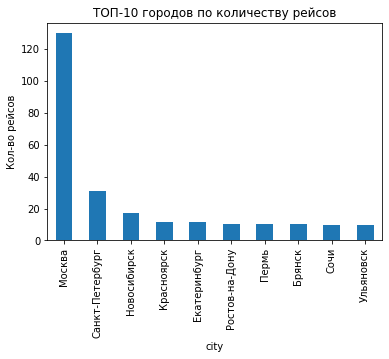

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


In [4]:
df2.groupby(by='city')['average_flights'].sum().sort_values(ascending=False).head(10).plot(title='ТОП-10 городов по количеству рейсов', kind='bar')
plt.ylabel('Кол-во рейсов')
plt.show()
df2.sort_values(by='average_flights', ascending=False).head(10)


Москва, ожидаемо, занимает первую строчку. Причём она сильно опережает по количеству рейсов даже следующий за ней Санкт-Петербург (в четыре раза больше прилетающих рейсов в день). Сентябрь - время, когда в Москву и Петербург возвращаются студенты из регионов.
Свою роль играет и то, что в Москве больше аэропортов чем в Питере

<a id="3"></a>
### 3. Количество рейсов у разных моделей самолётов

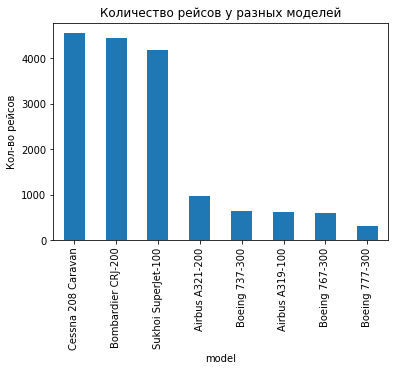

,model,flights_amount
6,Cessna 208 Caravan,4557
5,Bombardier CRJ-200,4446
7,Sukhoi SuperJet-100,4185
1,Airbus A321-200,960
2,Boeing 737-300,630
0,Airbus A319-100,607
3,Boeing 767-300,600
4,Boeing 777-300,300


In [5]:
df.groupby(by='model')['flights_amount'].sum().sort_values(ascending=False).head(10).plot(title='Количество рейсов у разных моделей', kind='bar')
plt.ylabel('Кол-во рейсов')
plt.show()
df.sort_values(by='flights_amount', ascending=False).head(10)


Больше всего рейсов в день совершают Cessna 208 Caravan, Bombardier CRJ-200 и Sukhoi SuperJet-100 - 4-4,5 тысячи. Остальные сильно от них отстают и совершают меньше тысячи рейсов в день. Свою роль играет и то, что в Москве аэропортов больше, чем в Петербурге.

<a id="4"></a>
### 4. Города и количество рейсов. Точечный график

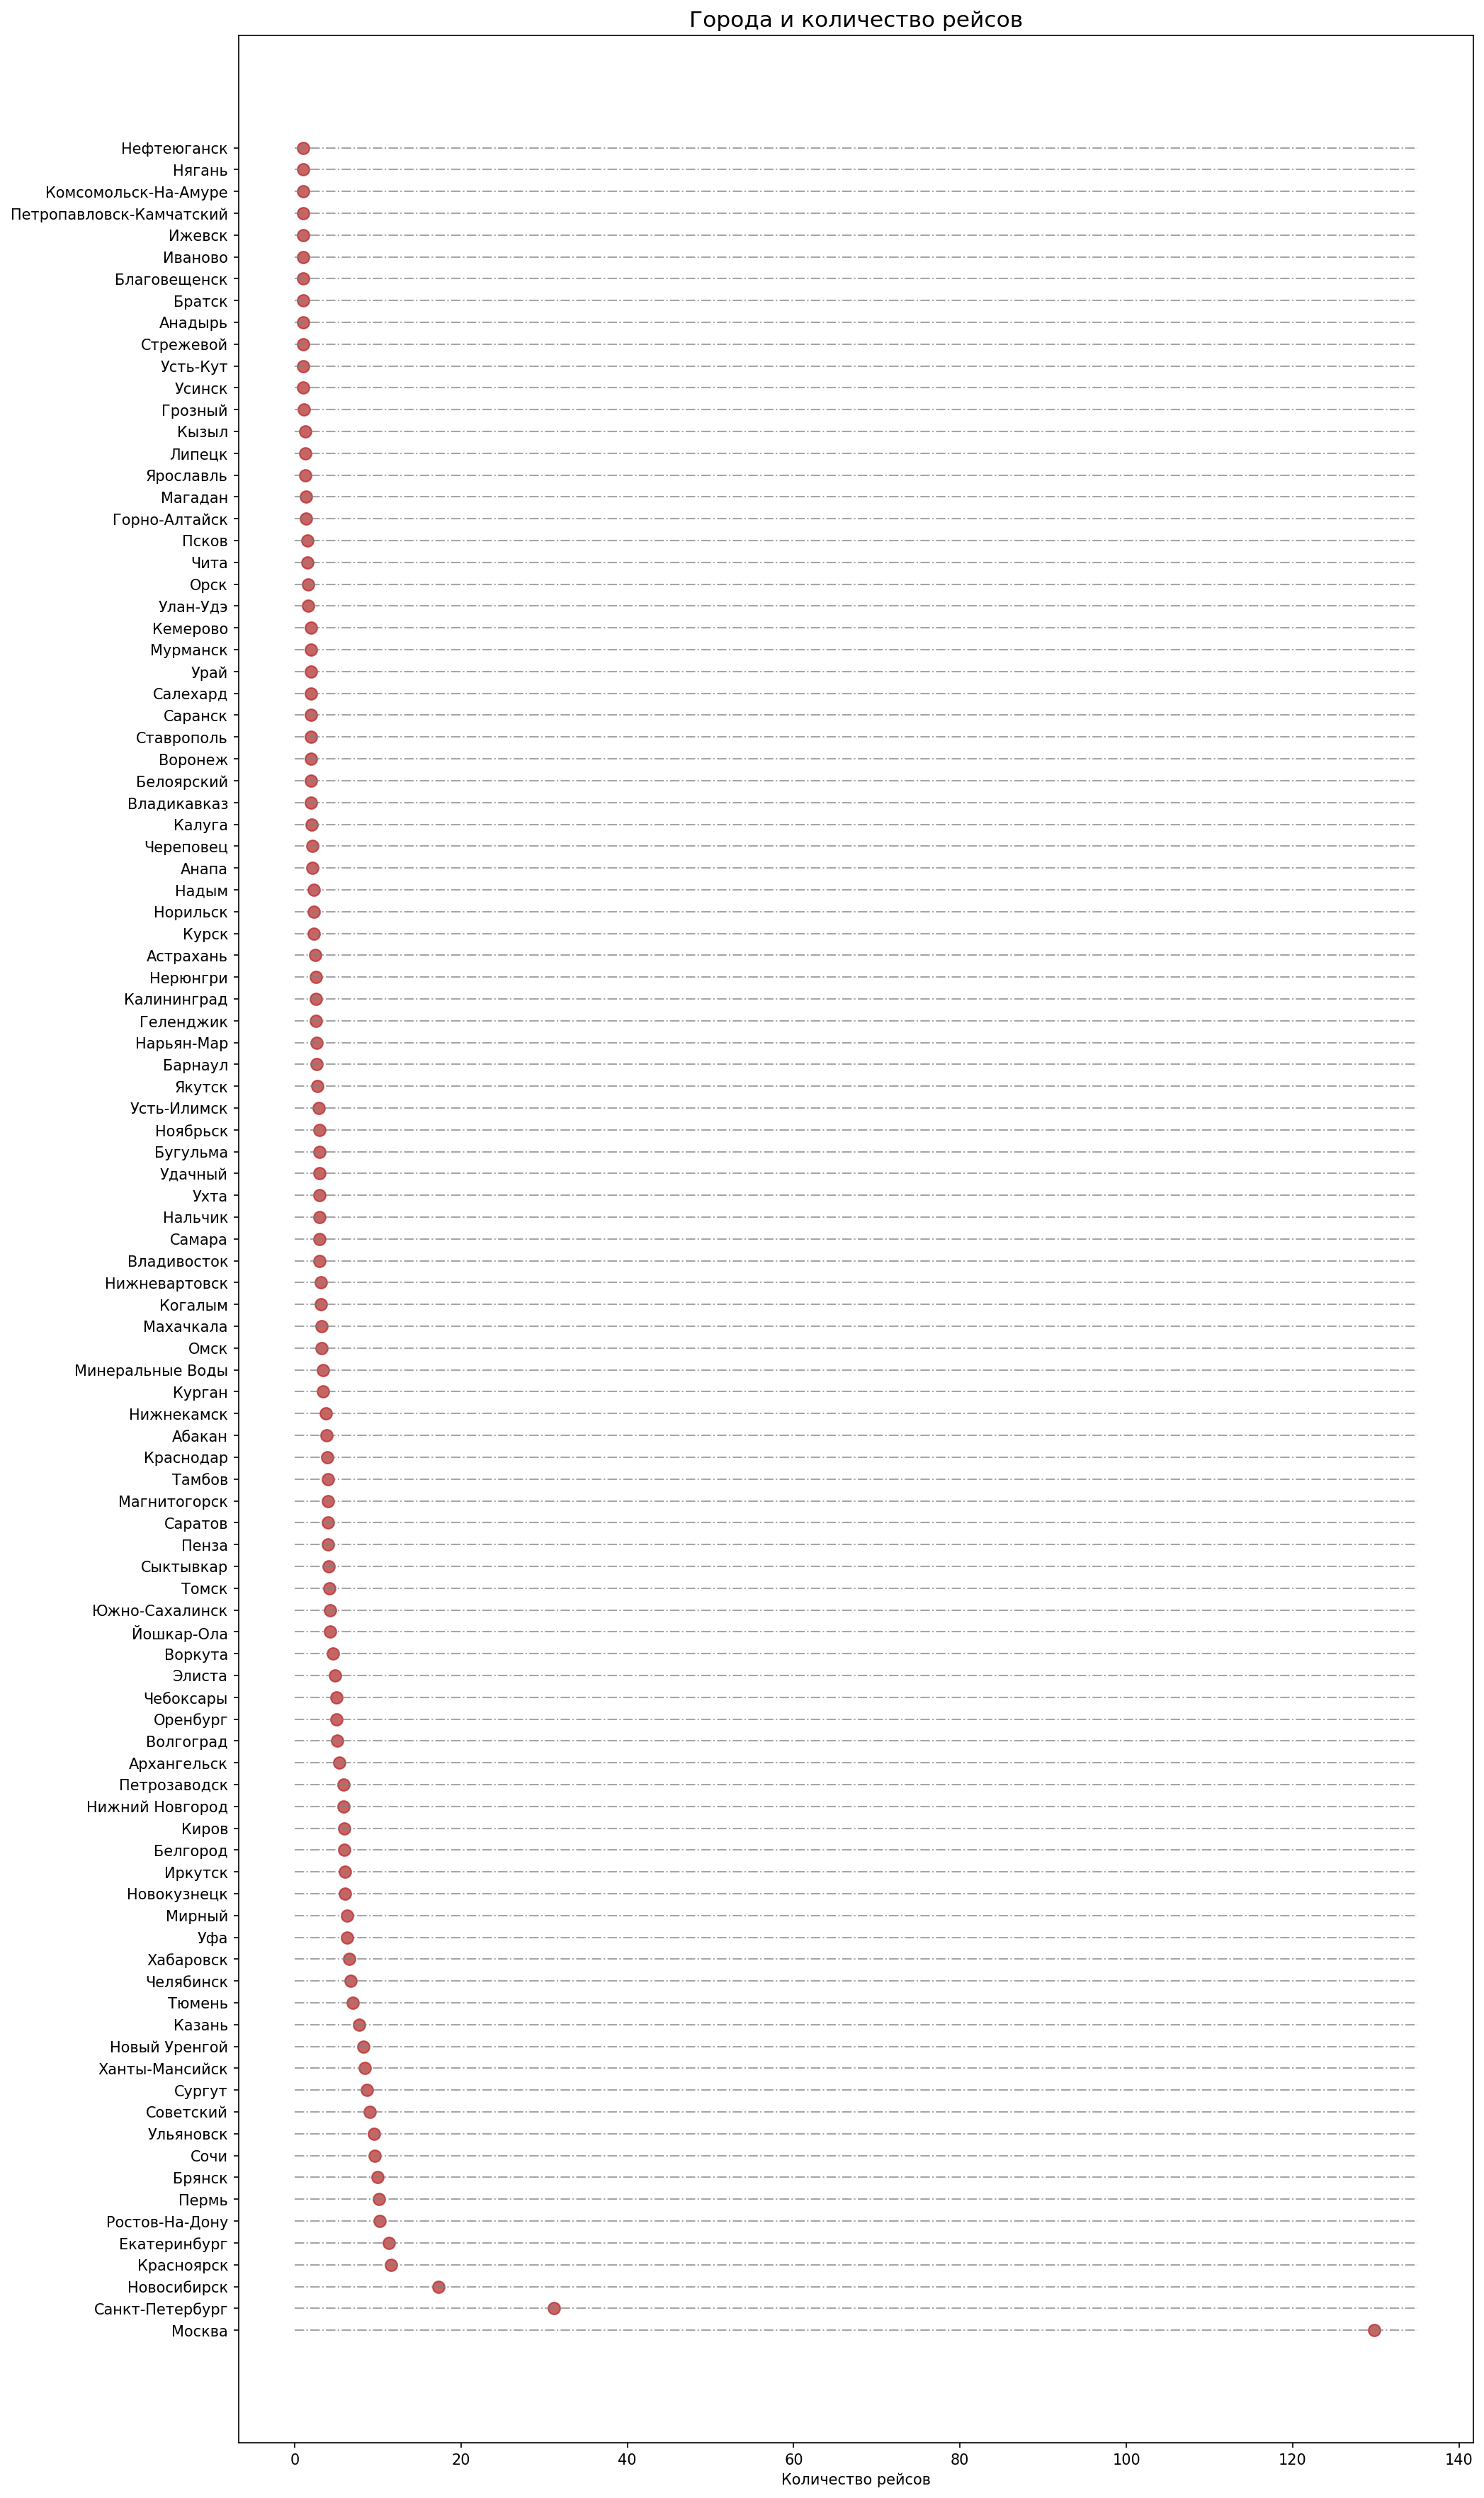

In [6]:
# df2.groupby(by='city')['average_flights'].sum().sort_values(ascending=False).head(10).plot(title='ТОП-10 городов по количеству рейсов', kind='bar')
# plt.ylabel('Кол-во рейсов')
# plt.show()
# df2.sort_values(by='average_flights', ascending=False).head(10)


# Prepare Data
df3 = df2.copy()
df3.sort_values('average_flights', ascending=False, inplace=True)
df3.reset_index(inplace=True)
# Draw plot
fig, ax = plt.subplots(figsize=(15,30), dpi= 150)
ax.hlines(y=df3.index, xmin=0, xmax=135, color='gray', alpha=0.7, linewidth=1, linestyles='dashdot')
ax.scatter(y=df3.index, x=df3.average_flights, s=65, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_title('Города и количество рейсов', fontdict={'size':15})
ax.set_xlabel('Количество рейсов')
ax.set_yticks(df3.index)
ax.set_yticklabels(df3.city.str.title(), fontdict={'horizontalalignment': 'right'})
# ax.set_xlim(0, 20)
plt.show()

Меньше всего рейсов в день в сентябре 2018 года принимал у себя принимали Нефтеюганск, Ижевск, Благовещенск и ещё с два десятка городов. Исходя из наших данных можно сделать вывод, что авиасообщение в этих городах не пользуется популярностью. С городами-лидерами по количеству прибывающих рейсов мы уже знакомы.

<a id="5"></a>
### 5. Общий вывод


Мы составили рейтинг городов, в которые в сентябре 2018 в день прибывало больше всего авиарейсов.

ТОП-10 выглядит так:

1. Москва -	130
2.	Санкт-Петербург - 31
3.	Новосибирск	- 17
4.	Красноярск	- 11
5.	Екатеринбург - 11
6.	Ростов-на-Дону	- 10
7.	Пермь	- 10
8.	Брянск	- 10
9.	Сочи	- 10
10.	Ульяновск - 9

Мы также составили рейтинг популярности разных моделей в сентябре 2018 года по количеству рейсов:

1.	Cessna 208 Caravan	- 4557
2.	Bombardier CRJ-200	- 4446
3.	Sukhoi SuperJet-100	- 4185
4.	Airbus A321-200	- 960
5.	Boeing 737-300	- 630
6.	Airbus A319-100	- 607
7.	Boeing 767-300	- 600
8.	Boeing 777-300	- 300

На точечном графике мы также изобразили все города и количество прибывающих в них рейсов в день. На нём видно, что в большинство из представленных городов в сентябре 2018 года в среднем прибывало до 20 рейсов в день. Также очевиден огромный разрыв между Москвой и другими городами, включая Санкт-Петербург.